# Week 8 - Implementing a model in numpy and a survey of machine learning packages for python

This week we will be looking in detail at how to implement a supervised regression model using the base scientific computing packages available with python.

We will also be looking at the different packages available for python that implement many of the algorithms we might want to use.

## Regression with numpy

Why implement algorithms from scratch when dedicated packages already exist? 

The packages available are very powerful and a real time saver but they can obscure some issues we might encounter if we don't know to look for them. By starting with just numpy these problems will be more obvious. We can address them here and then when we move on we will know what to look for and will be less likely to miss them.

The dedicated machine learning packages implement the different algorithms but we are still responsible for getting our data in a suitable format.

In [145]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

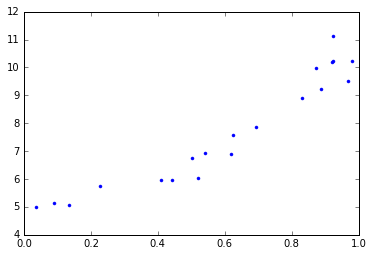

In [155]:
n = 20
x = np.random.random((n,1))
y = 5 + 6 * x ** 2 + np.random.normal(0,0.5, size=(n,1))


plt.plot(x, y, 'b.')
plt.show()

This is a very simple dataset. There is only one input value for each record and then there is the output value. Our goal is to determine the output value or dependent variable, shown on the y-axis, from the input or independent variable, shown on the x-axis.

Our approach should scale to handle multiple input, or independent, variables. The independent variables can be stored in a vector, a 1-dimensional array:

$$X^T = (X_{1}, X_{2}, X_{3})$$

As we have multiple records these can be stacked in a 2-dimensional array. Each record becomes one row in the array. Our `x` variable is already set up in this way.

In linear regression we can compute the value of the dependent variable using the following formula:

$$f(X) =  \beta_{0}  +  \sum_{j=1}^p X_j\beta_j$$

The $\beta_{0}$ term is the intercept, and represents the value of the dependent variable when the independent variable is zero.

Calculating a solution is easier if we don't treat the intercept as special. Instead of having an intercept co-efficient that is handled separately we can instead add a variable to each of our records with a value of one.

In [156]:
intercept_x = np.hstack((np.ones((n,1)), x))
intercept_x

array([[ 1.        ,  0.44203564],
       [ 1.        ,  0.51995237],
       [ 1.        ,  0.69395641],
       [ 1.        ,  0.09088573],
       [ 1.        ,  0.2277595 ],
       [ 1.        ,  0.41030156],
       [ 1.        ,  0.62329467],
       [ 1.        ,  0.88696078],
       [ 1.        ,  0.61882617],
       [ 1.        ,  0.13346147],
       [ 1.        ,  0.98058013],
       [ 1.        ,  0.87178573],
       [ 1.        ,  0.50272076],
       [ 1.        ,  0.92234798],
       [ 1.        ,  0.54138079],
       [ 1.        ,  0.92330607],
       [ 1.        ,  0.82989737],
       [ 1.        ,  0.96828641],
       [ 1.        ,  0.91978281],
       [ 1.        ,  0.03603382]])

[Numpy contains the linalg module](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html) with many common functions for performing linear algebra. Using this module finding a solution is quite simple.

In [157]:
np.linalg.lstsq(intercept_x,y)

(array([[ 3.93279564],
        [ 6.22964209]]),
 array([ 8.01484505]),
 2,
 array([ 5.28099126,  1.14327788]))

The values returned are:

* The least-squares solution
* The sum of squared residuals
* The rank of the independent variables
* The singular values of the independent variables

## Exercise

1. Calculate the predictions our model would make
2. Calculate the sum of squared residuals from our predictions. Does this match the value returned by lstsq?

In [165]:
coeff, residuals, rank, sing_vals = np.linalg.lstsq(intercept_x,y)

In [164]:
predictions = 

SyntaxError: invalid syntax (<ipython-input-164-9f9770d7404a>, line 2)

Least squares refers to the cost function for this algorithm. The objective is to minimize the residual sum of squares. The difference between the actual and predicted values is calculated, it is squared and then summed over all records. The function is as follows:

$$RSS(\beta) = \sum_{i=1}^{N}(y_i - x_i^T\beta)^2$$

## Matrix arithmetic

Within lstsq all the calculations are performed using matrix arithmetic rather than the more familiar element-wise arithmetic numpy arrays generally perform. Numpy does have a matrix type but matrix arithmetic can also be performed on standard arrays using dedicated methods.

![Matrix multiplication](https://upload.wikimedia.org/wikipedia/commons/e/eb/Matrix_multiplication_diagram_2.svg)
_Source: Wikimedia Commons (User:Bilou)_

In matrix multiplication the resulting value in any position is the sum of multiplying each value in a row in the first matrix by the corresponding value in a column in the second matrix.

The residual sum of squares can be calculated with the following formula:

$$RSS(\beta) = (y - X\beta)^T(y-X\beta)$$

The value of our co-efficients can be calculated with:

$$\hat\beta = (X^TX)^{-1}X^Ty$$

Unfortunately, the result is not as visually appealing as in languages that use matrix arithmetic by default.

In [167]:
our_coeff = np.dot(np.dot(np.linalg.inv(np.dot(intercept_x.T, intercept_x)), intercept_x.T), y)

print(coeff, '\n', our_coeff)

[[ 3.93279564]
 [ 6.22964209]] 
 [[ 3.93279564]
 [ 6.22964209]]


In [168]:
our_predictions = np.dot(intercept_x, our_coeff)

np.hstack((predictions, 
           our_predictions
          ))

NameError: name 'predictions' is not defined

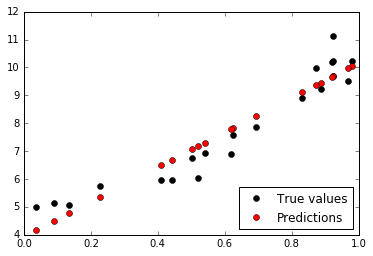

In [169]:
plt.plot(x, y, 'ko', label='True values')
plt.plot(x, our_predictions, 'ro', label='Predictions')
plt.legend(numpoints=1, loc=4)
plt.show()

## Exercise

1. Plot the residuals. The x axis will be the independent variable (x) and the y axis the residual between our prediction and the true value.
2. Plot the predictions generated for our model over the entire range of 0-1. One approach is to use the np.linspace method to create equally spaced values over a specified range.

## Types of independent variable

The independent variables can be many different types.

* Quantitative inputs
* Categorical inputs coded using dummy values
* Interactions between multiple inputs
* Tranformations of other inputs, e.g. logs, raised to different powers, etc.

It is important to note that a _linear_ model is only _linear_ with respect to its inputs. Those input variables can take any form.

One approach we can take to improve the predictions from our model would be to add in the square, cube, etc of our existing variable.

[[  2.48528927e+05]
 [ -1.71103499e+07]
 [  4.65315707e+08]
 [ -6.91480377e+09]
 [  6.44385305e+10]
 [ -4.06133878e+11]
 [  1.81054068e+12]
 [ -5.85359860e+12]
 [  1.38391083e+13]
 [ -2.36324769e+13]
 [  2.76241766e+13]
 [ -1.78960448e+13]
 [ -3.36195922e+12]
 [  2.22108078e+13]
 [ -2.64916311e+13]
 [  1.80609411e+13]
 [ -7.62315594e+12]
 [  1.86509989e+12]
 [ -2.03646141e+11]]


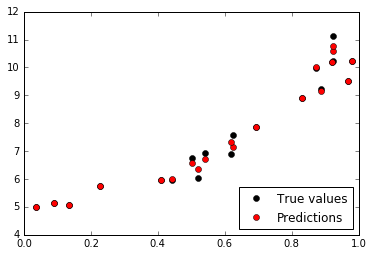

In [170]:
x_expanded = np.hstack((x**i for i in range(1,20)))

b, residuals, rank, s = np.linalg.lstsq(x_expanded, y)
print(b)

plt.plot(x, y, 'ko', label='True values')
plt.plot(x, np.dot(x_expanded, b), 'ro', label='Predictions')
plt.legend(numpoints=1, loc=4)
plt.show()

There is a tradeoff with model complexity. As we add more complexity to our model we can fit our training data increasingly well but eventually will lose our ability to generalize to new data.

Very simple models __underfit__ the data and have high __bias__.

Very complex models __overfit__ the data and have high __variance__.

The goal is to detect true sources of variation in the data and ignore variation that is just noise.

How do we know if we have a good model? A common approach is to break up our data into a training set, a validation set, and a test set. 

* We train models with different parameters on the training set.
* We evaluate each model on the validation set, and choose the best
* We then measure the performance of our best model on the test set.

__What would our best model look like?__ Because we are using dummy data here we can easily make more.

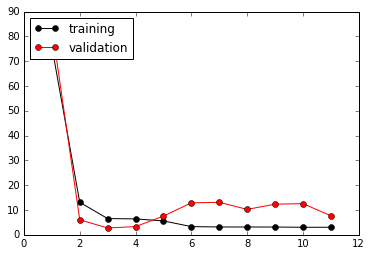

In [171]:
n = 20
p = 12
training = []
val = []
for i in range(1, p):
    np.random.seed(0)
    x = np.random.random((n,1))
    y = 5 + 6 * x ** 2 + np.random.normal(0,0.5, size=(n,1))
    x = np.hstack((x**j for j in np.arange(i)))
    our_coeff = np.dot(
                np.dot(
                    np.linalg.inv(
                        np.dot(
                            x.T, x
                        )
                    ), x.T
                ), y
            )
    our_predictions = np.dot(x, our_coeff)
    our_training_rss = np.sum((y - our_predictions) ** 2)
    training.append(our_training_rss)
    
    val_x = np.random.random((n,1))
    val_y = 5 + 6 * val_x ** 2 + np.random.normal(0,0.5, size=(n,1))
    val_x = np.hstack((val_x**j for j in np.arange(i)))
    our_val_pred = np.dot(val_x, our_coeff)
    our_val_rss = np.sum((val_y - our_val_pred) ** 2)
    val.append(our_val_rss)
    #print(i, our_training_rss, our_val_rss)

plt.plot(range(1, p), training, 'ko-', label='training')
plt.plot(range(1, p), val, 'ro-', label='validation')
plt.legend(loc=2)
plt.show()

## Gradient descent

One limitation of our current implementation is that it is resource intensive. For very large datasets an alternative is needed. Gradient descent is often preferred, and particularly stochastic gradient descent for very large datasets.

Gradient descent is an iterative process, repetitively calculating the error and changing the coefficients slightly to reduce that error. It does this by calculating a gradient and then descending to a minimum in small steps.

Stochastic gradient descent calculates the gradient on a small batch of the data, updates the coefficients, loads the next chunk of the data and repeats the process.

We will just look at a basic gradient descent model.

In [172]:
np.random.seed(0)
n = 200
x = np.random.random((n,1))
y = 5 + 6 * x ** 2 + np.random.normal(0,0.5, size=(n,1))
intercept_x = np.hstack((np.ones((n,1)), x))
coeff, residuals, rank, sing_vals = np.linalg.lstsq(intercept_x,y)
print('lstsq', coeff)



def gradient_descent(x, y, rounds = 1000, alpha=0.01):
    theta = np.zeros((x.shape[1], 1))
    costs = []
    for i in range(rounds):
        prediction = np.dot(x, theta)
        error = prediction - y
        gradient = np.dot(x.T, error / y.shape[0])
        theta -= gradient * alpha
        costs.append(np.sum(error ** 2))
    return (theta, costs) 
theta, costs = gradient_descent(intercept_x, y, rounds=10000)
print(theta, costs[::500])

lstsq [[ 4.07959732]
 [ 5.69608619]]
[[ 4.08212025]
 [ 5.69136537]] [10215.151832573791, 151.49738175162241, 120.99886225509709, 104.87099032951339, 96.334352755009746, 91.815828439379132, 89.424130090614341, 88.158181167489815, 87.488102235174722, 87.13342301602863, 86.945687896436965, 86.846317893274772, 86.793720395534692, 86.765880034455108, 86.751143863756042, 86.743343866972538, 86.739215253707584, 86.737029939025462, 86.735873230960678, 86.735260974264634]


lstsq [[  5.47554054e+00]
 [ -2.39855397e+01]
 [ -2.16608732e+03]
 [  1.83443739e+05]
 [ -5.27245313e+06]
 [  8.26516683e+07]
 [ -8.23118154e+08]
 [  5.62639497e+09]
 [ -2.76438408e+10]
 [  1.00543636e+11]
 [ -2.75843668e+11]
 [  5.77141231e+11]
 [ -9.24891464e+11]
 [  1.13282985e+12]
 [ -1.05057010e+12]
 [  7.23919989e+11]
 [ -3.58600661e+11]
 [  1.20492881e+11]
 [ -2.45402172e+10]
 [  2.28151842e+09]]
[[ 4.79516406]
 [ 2.15892204]
 [ 1.59022686]
 [ 1.12552832]
 [ 0.76583482]
 [ 0.50446167]
 [ 0.31909476]
 [ 0.18845052]
 [ 0.09618612]
 [ 0.0306512 ]
 [-0.01621254]
 [-0.04991523]
 [-0.07421911]
 [-0.09170582]
 [-0.10416419]
 [-0.11285053]
 [-0.11866168]
 [-0.12224985]
 [-0.1240988 ]
 [-0.12457462]] [10215.151832573791, 54.942826326885879, 49.019636887639798, 48.508526705309478, 48.258178349345279, 48.117210951931447, 48.030663705920169, 47.971678161563304, 47.927021249546534, 47.890143189067288, 47.857775390826845, 47.828262392661784, 47.800743812843862, 47.77475299941122, 47.750019966

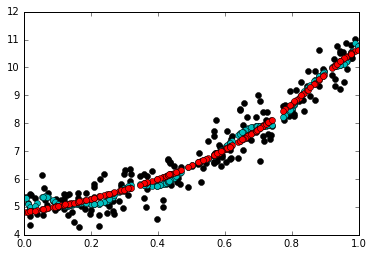

In [173]:
np.random.seed(0)
n = 200

x = np.random.random((n,1))
y = 5 + 6 * x ** 2 + np.random.normal(0,0.5, size=(n,1))
x = np.hstack((x**j for j in np.arange(20)))

coeff, residuals, rank, sing_vals = np.linalg.lstsq(x,y)
print('lstsq', coeff)

theta, costs = gradient_descent(x, y, rounds=10000)
print(theta, costs[::500])

plt.plot(x[:,1], y, 'ko')
plt.plot(x[:,1], np.dot(x, coeff), 'co')
plt.plot(x[:,1], np.dot(x, theta), 'ro')
plt.show()

## Machine learning packages available in the python ecosystem

[Overview in the python wiki](https://wiki.python.org/moin/PythonForArtificialIntelligence)

General
* [scikit-learn](http://scikit-learn.org/stable/)
* [milk](https://pythonhosted.org/milk/)
* [Orange](http://orange.biolab.si/)
* [Shogun](http://www.shogun-toolbox.org/)
* [GraphLab Create (dato)](https://dato.com/learn/userguide/)

There is a collection of field specific packages including some with machine learning components on the [scipy website](http://www.scipy.org/topical-software.html#science-basic-tools). Other packages can often be found searching the [python package index](https://pypi.python.org/pypi).


Deep learning is receiving a lot of attention recently and a number of different packages have been developed.
* [Theano](http://www.deeplearning.net/software/theano/)
* [pylearn2](http://deeplearning.net/software/pylearn2/)
* [keras](http://keras.io/)
* [Blocks](http://blocks.readthedocs.org/en/latest/)
* [Lasagne](http://lasagne.readthedocs.org/en/latest/)

## Scikit-learn

Scikit-learn is now widely used. It includes modules for:
* Classification
* Regression
* Clustering
* Dimensionality reduction
* Model selection
* Preprocessing

There are modules for training online models, enabling very large datasets to be analyzed.

There is also a semi-supervised module for situations when you have a large dataset, but only have labels for part of the dataset.

## Milk

Milk works very well with mahotas, a package for image processing. With the recent improvements in scikit-image milk is now less attractive, although still a strong option

## Orange and Shogun

These are both large packages but for whatever reason do not receive the attention that scikit-learn does.

## Dato

Dato is a relative newcomer and has been receiving a lot of attention lately. Time will tell whether it can compete with scikit-learn.

# Assignments

This week we will continue working on our project ideas. As you develop the outline some points you may want to consider:

For projects developing the object oriented programming component of the course:

* What will your classes be?
* What will each class have as attributes and methods?
* How will your classes interact?

For projects developing GUIs or web applications:

* What will your screens/pages be?
* What components will each page need?
* How will you store any data needed/produced?

For projects developing machine learning models:

* What will be your data?
* How is your data structured?
* How much data do you have?
* Is your data labeled?
* What type of machine learning task is it?
* How good would the performance need to be for the model to be useful?

You do not need to answer all these questions. Each answer does not need to be complete. Your final project will likely be different to your initial idea.

The goal of the project description is to document your project as you currently envision it and to encourage planning for the earliest stage.

__Your project descriptions should be sent to me by our class next week.__